In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Question 1
oil = pd.read_csv('oil_reserves.csv')
#oil.iloc[:,-1] 

In [10]:
# Which region has max oil reserves from 2014 to 2016?

oil['total 14-16'] = oil.iloc[:,-1] + oil.iloc[:,-2] + oil.iloc[:,-3]
oil[oil['total 14-16'] == oil['total 14-16'].max()]['Region']

9    S. & Cent. America
Name: Region, dtype: object

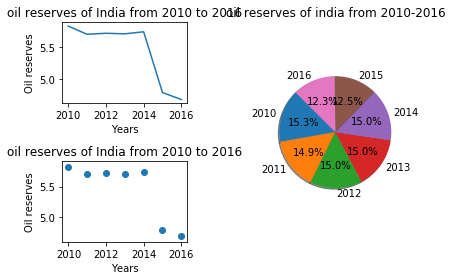

In [42]:
# With suitable visualization show the oil reserves of India from 2010 to 2016.

y = np.array(oil[oil['Country/ Region']=='India'].iloc[:,2:9])[0]
x = np.arange(2010,2017)

#patches, text = 
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(1,2,2)
ax3 = fig.add_subplot(2,2,3)

ax2.pie(y, labels = x, autopct='%1.1f%%', shadow=True, startangle=135)
ax2.axis('equal')
ax2.set_title('oil reserves of india from 2010-2016')

ax1.plot(x,y)
ax1.set_xlabel('Years')
ax1.set_ylabel('Oil reserves')
ax1.set_title('oil reserves of India from 2010 to 2016')

ax3.scatter(x,y)
ax3.set_xlabel('Years')
ax3.set_ylabel('Oil reserves')
ax3.set_title('oil reserves of India from 2010 to 2016')
#plt.legend(patches, x, loc = 'best')
plt.tight_layout()
plt.show()

In [172]:
# List the countries having maximum oil reserves in each region.

gb = oil.groupby('Region')['Region','Country/ Region','2016']

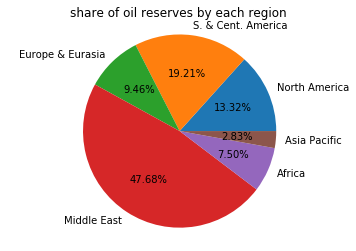

In [105]:
# Draw suitable visualization which shows the share of oil reserves by each region.
def tot_reserves(reg):
    sum = oil[oil['Region'] == reg]['2016'].sum()
    return sum

reg = pd.DataFrame()
reg['Region'] = oil['Region'].unique()
#reg['oil'] = [1,2,3,1,6,7]
o_r = []
for i in reg['Region']:
    r = tot_reserves(i)
    o_r.append(r)
#reg['oil reserves'] = 
reg['oil reserves'] = o_r

x = np.arange(0,len(reg))
y = reg['oil reserves']
lab = reg['Region']

plt.pie(y,labels=lab, autopct = '%1.2f%%')
plt.axis('equal')
plt.title('share of oil reserves by each region')
plt.show()

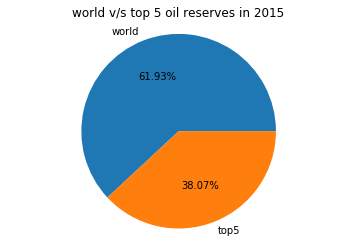

In [168]:
# Find the world’s top 5 countries having maximum oil reserves in the 2015. Show their % of share in total oil reserve for the same year.

top = pd.DataFrame(oil.sort_values(by = '2015',ascending = False))
top5 = top.head()
tv = []
for i in range(0,len(oil)):
    tv.append(oil['Country/ Region'][i] in top)
#print(oil[tv].iloc[:,[0,1,7]])
#a = oil[tv]['2015'].sum()
x = []
x.append(top['2015'].sum())
x.append(top5['2015'].sum())

plt.pie(x,labels=['world','top5'], autopct = '%1.2f%%')
plt.axis('equal')
plt.title('world v/s top 5 oil reserves in 2015')
plt.show()

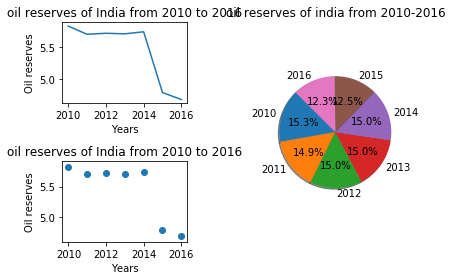

In [169]:
# Draw any type of visualizations you know.
# With suitable visualization show the oil reserves of India from 2010 to 2016.

y = np.array(oil[oil['Country/ Region']=='India'].iloc[:,2:9])[0]
x = np.arange(2010,2017)

#patches, text = 
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(1,2,2)
ax3 = fig.add_subplot(2,2,3)

ax2.pie(y, labels = x, autopct='%1.1f%%', shadow=True, startangle=135)
ax2.axis('equal')
ax2.set_title('oil reserves of india from 2010-2016')

ax1.plot(x,y)
ax1.set_xlabel('Years')
ax1.set_ylabel('Oil reserves')
ax1.set_title('oil reserves of India from 2010 to 2016')

ax3.scatter(x,y)
ax3.set_xlabel('Years')
ax3.set_ylabel('Oil reserves')
ax3.set_title('oil reserves of India from 2010 to 2016')
#plt.legend(patches, x, loc = 'best')
plt.tight_layout()
plt.show()

In [210]:
# Question 2
mp = pd.read_csv('milk_production.csv')
mp.head()
mp = mp.fillna(0)
mp.head()

,Category,State/ UT Name,Cow Milk-2010-11,Cow Milk-2011-12,Cow Milk-2013-14,Cow Milk-2014-15,Cow Milk-2015-16,Boffalo Milk-2010-11,Boffalo Milk-2011-12,Boffalo Milk-2013-14,Boffalo Milk-2014-15,Boffalo Milk-2015-16,Goat Milk-2010-11,Goat Milk-2011-12,Goat Milk-2013-14,Goat Milk-2014-15,Goat Milk-2015-16
0,State,Andhra Pradesh,3102.0,3377.0,3799.0,3079,3369,8101.0,8710.0,9207.0,6574,7445,1.0,1.0,1.0,3,3
1,State,Arunachal Pradesh,28.0,22.0,43.0,46,50,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0
2,State,Assam,666.0,658.0,677.0,685,703,101.0,117.0,122.0,120,117,23.0,22.0,15.0,24,24
3,State,Bihar,3561.0,3661.0,3986.0,4318,4881,2798.0,2805.0,3015.0,3248,3210,158.0,177.0,196.0,209,198
4,State,Chhattisgarh,644.0,701.0,788.0,824,919,343.0,368.0,374.0,359,311,43.0,49.0,46.0,49,48


In [211]:

# Which state has produced max milk in year 2013-14?
mp['tot 13-14'] = mp.iloc[:,4]+mp.iloc[:,9]+mp.iloc[:,14]
mp[mp['tot 13-14']==mp['tot 13-14'].max()].iloc[:,1]

26    Uttar Pradesh
Name: State/ UT Name, dtype: object

In [212]:
# List top 5 milk producing states in each year from 2010 to 2015
mp['tot 10-11'] = mp.iloc[:,2]+mp.iloc[:,7]+mp.iloc[:,12]
mp['tot 11-12'] = mp.iloc[:,3]+mp.iloc[:,8]+mp.iloc[:,13]
mp['tot 14-15'] = mp.iloc[:,5]+mp.iloc[:,10]+mp.iloc[:,15]
print('2010-2011:',mp[mp['tot 10-11']==mp['tot 10-11'].max()].iloc[:,1],'\n2011-2012',mp[mp['tot 11-12']==mp['tot 11-12'].max()].iloc[:,1],'\n2013-2014:',mp[mp['tot 13-14']==mp['tot 13-14'].max()].iloc[:,1],'\n2014-2015:',mp[mp['tot 14-15']==mp['tot 14-15'].max()].iloc[:,1])

2010-2011: 26    Uttar Pradesh
Name: State/ UT Name, dtype: object 
2011-2012 26    Uttar Pradesh
Name: State/ UT Name, dtype: object 
2013-2014: 26    Uttar Pradesh
Name: State/ UT Name, dtype: object 
2014-2015: 26    Uttar Pradesh
Name: State/ UT Name, dtype: object


In [213]:
# Calculate average milk production by cow, buffalo and goat in each year for selected state.

st = input('Enter state\n')
r = mp[[mp['Category'] == 'State'] and mp['State/ UT Name']==st]
avg = (r.iloc[:,-1]+r.iloc[:,-2]+r.iloc[:,-3]+r.iloc[:,-4])/4
print('Average milk production by cow, buffalo and goat in each year for selected state:',avg)

Enter state
Kerala
Average milk production by cow, buffalo and goat in each year for selected state: 12    2681.5
dtype: float64


In [214]:
# List 5 states (if present) whose total milk production is increased for last three years.

mp.head()
mp[(mp.iloc[:,-1]>mp.iloc[:,-2]) & (mp.iloc[:,-2]>mp.iloc[:,-3])].iloc[:5,[1,-3,-2,-1]]

,State/ UT Name,tot 10-11,tot 11-12,tot 14-15
2,Assam,790.0,797.0,829
3,Bihar,6517.0,6643.0,7775
4,Chhattisgarh,1030.0,1118.0,1232
7,Haryana,6268.0,6661.0,7902
8,Himachal Pradesh,1102.0,1120.0,1173


Enter state
Assam


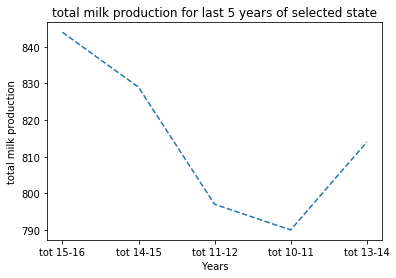

In [251]:
# Draw line graph showing total milk production for last 5 years of selected state

mp['tot 15-16'] = mp.iloc[:,6]+mp.iloc[:,11]+mp.iloc[:,16]

st = input('Enter state\n')
r = mp[[mp['Category'] == 'State'] and mp['State/ UT Name']==st]

y = [r.iloc[:,-1].values[0],r.iloc[:,-2].values[0],r.iloc[:,-3].values[0],r.iloc[:,-4].values[0],r.iloc[:,-5].values[0]]
x = [r.iloc[:,-1].name,r.iloc[:,-2].name,r.iloc[:,-3].name,r.iloc[:,-4].name,r.iloc[:,-5].name]
x_pos = np.arange(0,5)
plt.plot(x_pos,y,linestyle = 'dashed')
plt.xticks(x_pos,x)
plt.xlabel('Years')
plt.ylabel('total milk production')
plt.title('total milk production for last 5 years of selected state')
plt.show()

Enter state
Karnataka


/home/msois/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/msois/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/msois/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

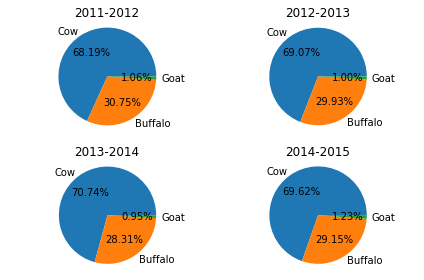

In [269]:
# Draw subplots of pie charts showing % milk productions by cow, buffalo and goat for last 4 years of selected state.
st = input('Enter state\n')
r = mp[[mp['Category'] == 'State'] and mp['State/ UT Name']==st]
r['Cow'] = r.iloc[:,3]+r.iloc[:,4]+r.iloc[:,5]+r.iloc[:,6]
r['Buffalo'] = r.iloc[:,8]+r.iloc[:,9]+r.iloc[:,10]+r.iloc[:,11]
r['Goat'] = r.iloc[:,13]+r.iloc[:,14]+r.iloc[:,15]+r.iloc[:,16]

y1 = [r.iloc[:,3].values[0],r.iloc[:,8].values[0],r.iloc[:,13].values[0]]
y2 = [r.iloc[:,4].values[0],r.iloc[:,9].values[0],r.iloc[:,14].values[0]]
y3 = [r.iloc[:,5].values[0],r.iloc[:,10].values[0],r.iloc[:,15].values[0]]
y4 = [r.iloc[:,6].values[0],r.iloc[:,11].values[0],r.iloc[:,16].values[0]]

lab = ['Cow','Buffalo','Goat']

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.pie(y1,labels=lab, autopct='%1.2f%%')
ax1.axis('equal')
ax1.set_title('2011-2012')

ax2.pie(y2,labels=lab, autopct='%1.2f%%')
ax2.axis('equal')
ax2.set_title('2012-2013')

ax3.pie(y3,labels=lab, autopct='%1.2f%%')
ax3.axis('equal')
ax3.set_title('2013-2014')

ax4.pie(y4,labels=lab, autopct='%1.2f%%')
ax4.axis('equal')
ax4.set_title('2014-2015')

#plt.title('milk productions by cow, buffalo and goat for last 4 years of selected state')
plt.tight_layout()
plt.show()